In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [241]:
class ModelPipeline():
    def __init__(self):
        self.oe = None
        self.ohe = None
        self.sc = None

    @staticmethod
    def cleaning(df):
        return df.drop(columns=['PassengerId', 'Name', 'Ticket'])
        
       
    @staticmethod
    def strip_cabin(x):
        if 'A' in x: return 'A'
        elif 'B' in x: return 'B'
        elif 'C' in x: return 'C'
        elif 'D' in x: return 'D'
        elif 'E' in x: return 'E'
        elif 'F' in x: return 'F'
        elif 'G' in x: return 'G'
        elif 'T' in x: return 'T'
        else: return 'None'

    
    def feature_engineering(self, df):
        new_df = df.copy()
        new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())
        new_df['Cabin'] = new_df['Cabin'].fillna('D')
        new_df['Cabin'] = new_df['Cabin'].apply(self.strip_cabin)
        new_df['Fare'] = new_df['Fare'].fillna(new_df['Fare'].mean())
        new_df['Embarked'] = new_df['Embarked'].fillna(new_df['Embarked'].mode()[0])
    
        return new_df
    
    @staticmethod
    def plot_features(df):
        plt.figure(figsize=(15,15))
        idx = 1
        for column in df.columns:
            plt.subplot(3, 3, idx, )
            plt.title(column)
            sns.histplot(data=df, x=column, hue="Survived", multiple="stack")
            sns.histplot()
            idx +=1

        plt.show()

    @staticmethod
    def plot_correlation(df):
        plt.figure(figsize=(10,10))
        sns.heatmap(df.corr(), annot=True)
        plt.show()


    def encoding(self, df, df_type):
        if df_type == 'train':
            self.oe = OrdinalEncoder()
            self.oe.fit(df[["Sex","Embarked"]])

            self.ohe = OrdinalEncoder()
            self.ohe.fit(df[["Cabin","Pclass"]])

        df[["Sex","Embarked"]] = self.oe.transform(df[["Sex","Embarked"]])

        df[["Cabin","Pclass"]] = self.ohe.transform(df[["Cabin","Pclass"]])

        return df
    
    def scaling(self, df, df_type):
        if df_type == 'train':
            self.sc = StandardScaler()
            self.sc.fit(df[["Age","Fare", "SibSp", "Parch", "Cabin","Pclass"]])

        df[["Age","Fare","SibSp", "Parch", "Cabin","Pclass"]] = self.sc.transform(df[["Age","Fare","SibSp", "Parch", "Cabin","Pclass"]])

        return df
    
    


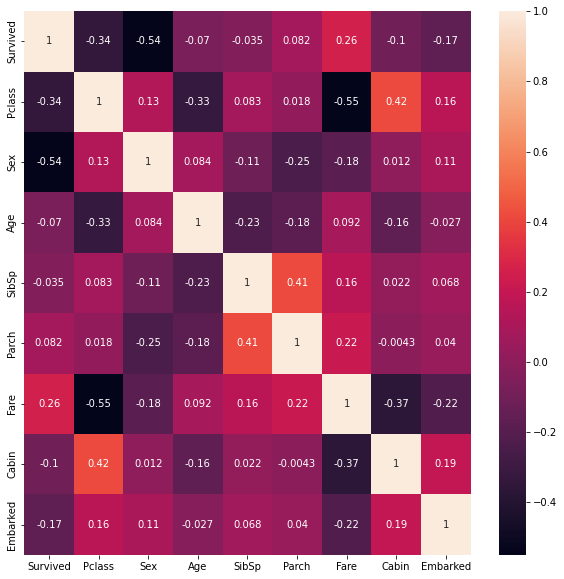

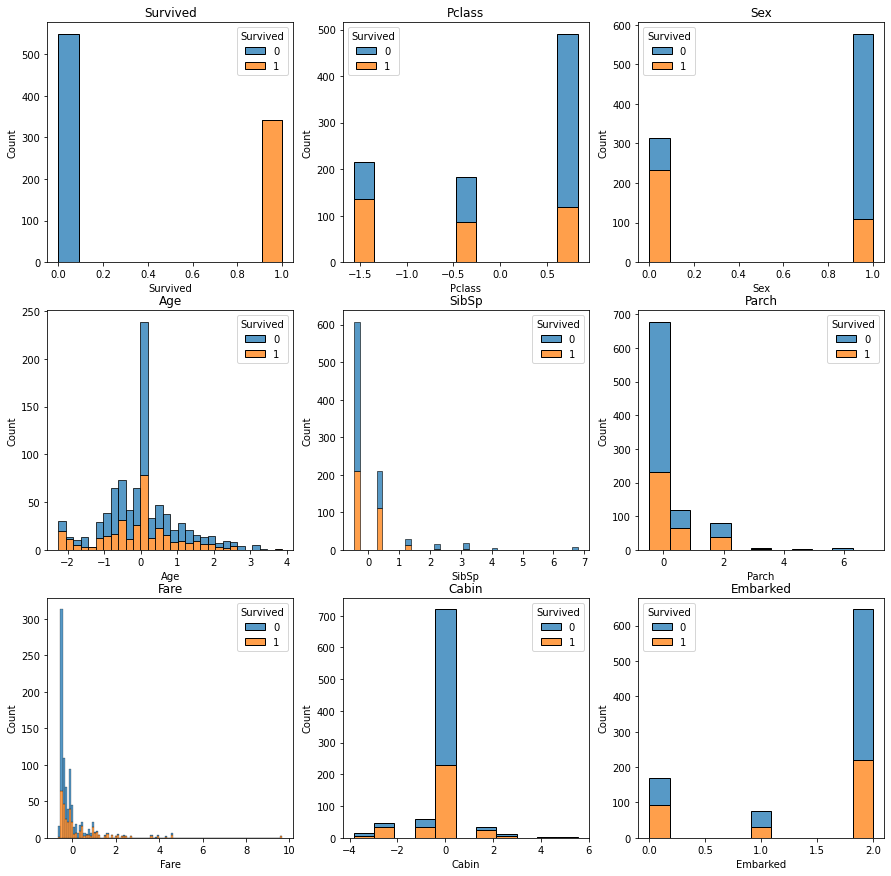

In [242]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
pipe = ModelPipeline()
train_data = pipe.cleaning(train_data )
test_data = pipe.cleaning(test_data)

train_data = pipe.feature_engineering(train_data)
test_data = pipe.feature_engineering(test_data)

train_data = pipe.encoding(train_data, 'train')
test_data = pipe.encoding(test_data, 'test')

train_data = pipe.scaling(train_data, 'train')
test_data = pipe.scaling(test_data, 'test')

pipe.plot_correlation(train_data)
pipe.plot_features(train_data)


train_data = train_data.reset_index()
test_data = test_data.reset_index()

X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Survived']), train_data[['Survived']], random_state=11, test_size=0.25)
X_test = test_data



In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

estimators = {"SVM":LinearSVC(), "RandomForest":RandomForestClassifier(), "KNN":KNeighborsClassifier(), "LogisticRegression":LogisticRegression()}

for model in estimators:

    estimators[model].fit(X_train, y_train)
    y_pred = estimators[model].predict(X_val)
    
    print(f"Model: {model}")
    print(classification_report(y_pred, y_val))

c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kuryl_ekdrvd0\AppData\Local\Temp\ipykernel_8676\1559761002.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimators[model].fit(X_train, y_train)


Model: SVM
              precision    recall  f1-score   support

           0       0.37      0.90      0.53        61
           1       0.92      0.43      0.59       162

    accuracy                           0.56       223
   macro avg       0.65      0.67      0.56       223
weighted avg       0.77      0.56      0.57       223

Model: RandomForest
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       161
           1       0.66      0.81      0.72        62

    accuracy                           0.83       223
   macro avg       0.79      0.82      0.80       223
weighted avg       0.85      0.83      0.83       223

Model: KNN
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       152
           1       0.33      0.35      0.34        71

    accuracy                           0.57       223
   macro avg       0.51      0.51      0.51       223
weighted avg       0.57      0.5

c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentatio

In [210]:

from sklearn.model_selection import RandomizedSearchCV

# Parameters of random forest classifier
n_estimators = [10, 20, 30, 40, 50, 80, 100, 150, 200, 100]
max_depth = [1, 5, 10, 50, 100]
min_samples_split = [1, 2]
max_features = ["sqrt", "log2"]
bootstrap = [True, False]

distributions = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "max_features": max_features,
    "bootstrap": bootstrap
}


rfc = RandomForestClassifier()
random_search_cv = RandomizedSearchCV(
    rfc,
    param_distributions=distributions,
    n_iter=30,
    cv=5,
    n_jobs=4
)

search = random_search_cv.fit(X_train, y_train)

cvres = search.cv_results_

for score, params, rank in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(score, params, rank)



nan {'n_estimators': 100, 'min_samples_split': 1, 'max_features': 'log2', 'max_depth': 1, 'bootstrap': True} 13
nan {'n_estimators': 30, 'min_samples_split': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False} 28
0.7649422062619236 {'n_estimators': 40, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 1, 'bootstrap': True} 12
nan {'n_estimators': 150, 'min_samples_split': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False} 27
nan {'n_estimators': 20, 'min_samples_split': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True} 26
0.8187969924812031 {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False} 4
0.8203456402199528 {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False} 1
0.809875434855796 {'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False} 8
nan {'n_estimators': 20, 'min_samples_split':

c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\kuryl_ekdrvd0\Desktop\code\LeetCode-HackerRank\venv\lib\site-pac

In [236]:
final_model = search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

#  Test for how well
submission_df = pd.read_csv("gender_submission.csv")
print(classification_report(y_pred, submission_df['Survived']))


result=pd.concat([submission_df['PassengerId'],pd.DataFrame(y_pred, columns=["Survived"])],axis='columns')
result.to_csv("submission.csv", index=False)




C:\Users\kuryl_ekdrvd0\AppData\Local\Temp\ipykernel_8676\2750812409.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.97      0.85      0.91       306
           1       0.69      0.94      0.80       112

    accuracy                           0.87       418
   macro avg       0.83      0.89      0.85       418
weighted avg       0.90      0.87      0.88       418

